# Lista 1

#### Questão 01.

In [2]:
%matplotlib inline
from sklearn import datasets
import sklearn
from matplotlib import pyplot as plt
from sklearn import linear_model, metrics
import numpy as np
import pandas as pd

In [3]:
sklearn.__version__

'0.19.1'

In [4]:
X, y = datasets.load_diabetes(return_X_y=True)
newdata = pd.read_csv('diabetes.csv')

In [5]:
X.shape

(442, 10)

In [6]:
newdata

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [7]:
y.shape

(442,)

#### Autoestudo sobre os dados

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function
* Age: Age (years)
* Outcome: Class variable (0 or 1)

In [8]:
colunas = ['pregnancies','glucose','bloodpressure','skinthickness','insulin','bmi','diabetespedigreefuncion','age','outcome']
newdata.columns = colunas

In [9]:
newdata.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefuncion,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies                768 non-null int64
glucose                    768 non-null int64
bloodpressure              768 non-null int64
skinthickness              768 non-null int64
insulin                    768 non-null int64
bmi                        768 non-null float64
diabetespedigreefuncion    768 non-null float64
age                        768 non-null int64
outcome                    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
newdata.describe()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefuncion,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Matriz de Correlação

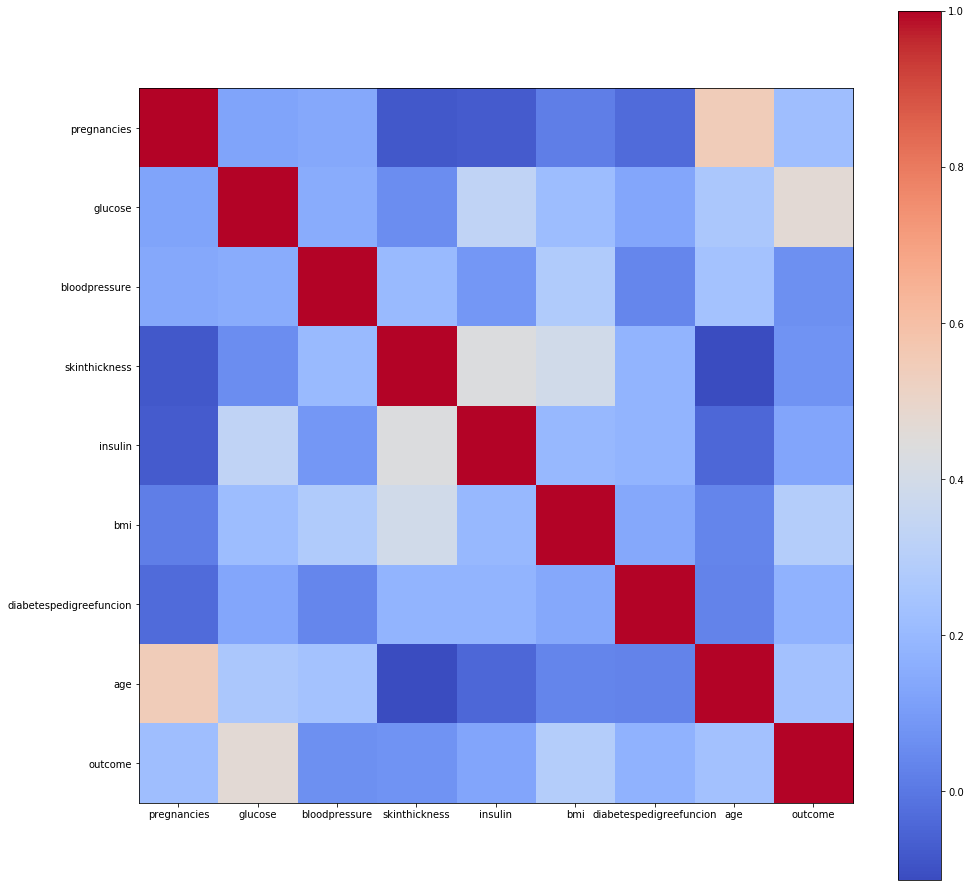

In [12]:
corr = newdata.corr()
plt.figure(figsize=(16,16))
plt.imshow(corr, cmap='coolwarm', interpolation=None)  
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)  
plt.yticks(range(len(corr)), corr.columns);

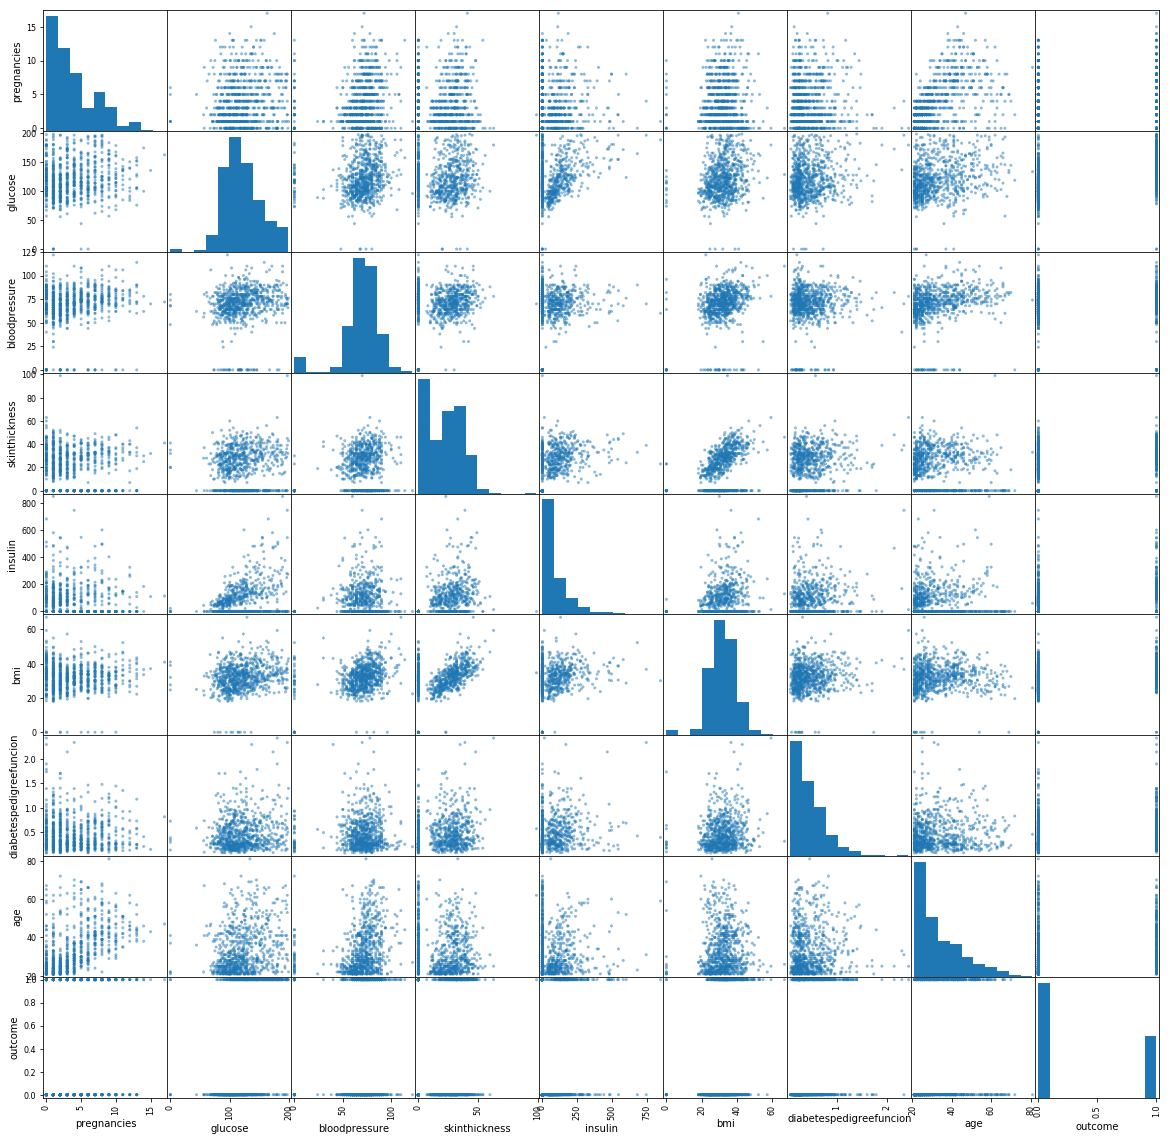

In [13]:
pd.plotting.scatter_matrix(newdata, figsize=(20,20));

## Questão 2. Mostre em gráficos a correlação entre cada feature (Xi) e o label (y). 

### A) A feature (xi) que melhor se ajusta a uma função linear é a feature 6 e 8, onde ambas apresentam um crescimento / descrecimento linear constante.

### B) A feature (xi) que pior se ajusta a uma função linear é a feature 1 e 7, onde ambas não consegue apresentar um crescimento / descrecimento linear constante entre os pontos.

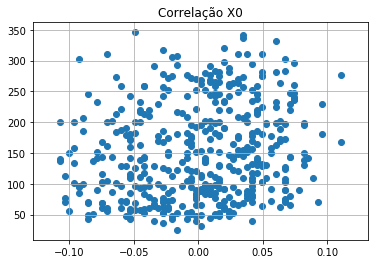

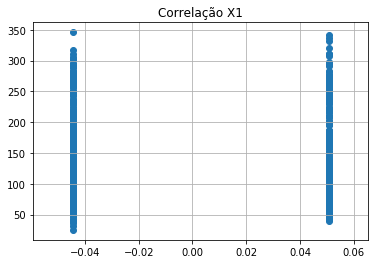

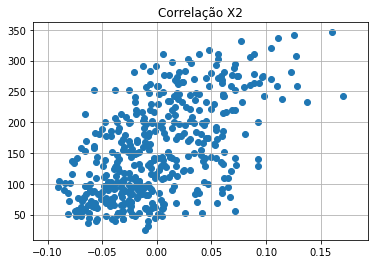

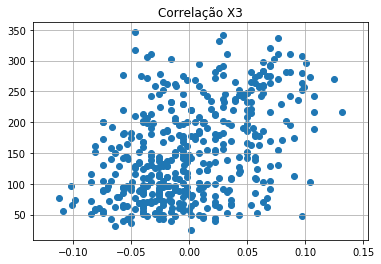

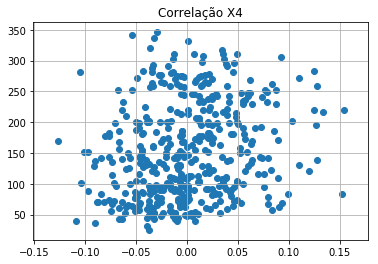

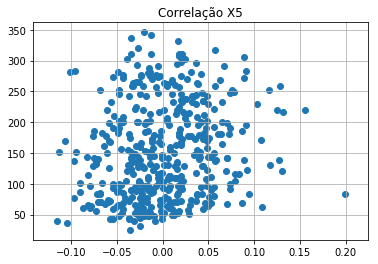

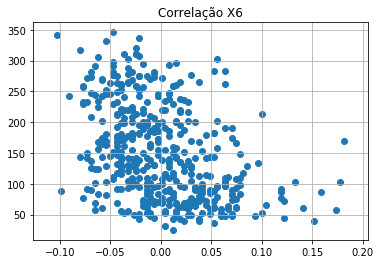

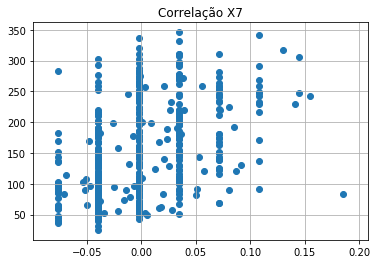

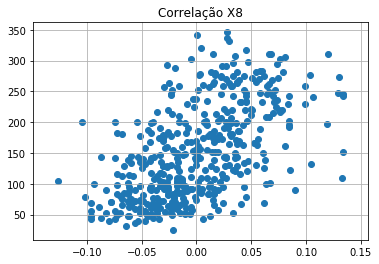

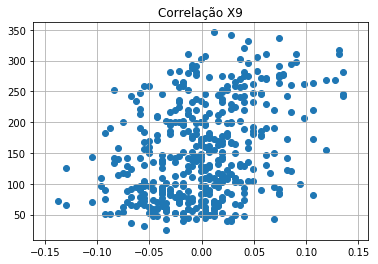

In [24]:
for i in range(X.shape[1]):
    plt.figure()
    plt.grid()
    plt.scatter(X[:, i], y)
    plt.title('Correlação X{}'.format(i))

## 3. Mostre em números a correlação entre cada feature (Xi) e o label (y).

In [25]:
for i in range(X.shape[1]):
    value = np.corrcoef(X[:, i], y)[0][1]
    print ('Correlação x' + str(i) + ' = ' + str(value))

Correlação x0 = 0.18788875071891975
Correlação x1 = 0.04306199845160541
Correlação x2 = 0.5864501344746886
Correlação x3 = 0.44148384893088605
Correlação x4 = 0.2120224810145508
Correlação x5 = 0.17405358696874243
Correlação x6 = -0.39478925067091825
Correlação x7 = 0.4304528847447732
Correlação x8 = 0.5658834252428097
Correlação x9 = 0.3824834842485811


## 4. Crie um modelo linear usando o Scikit Learn para representar os dados (todo o dataset).

In [26]:
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
#B0
b0 = model.intercept_
b0

152.1334841628965

In [28]:
#B1
b1 = model.coef_
b1

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

In [29]:
list(model.coef_)

[-10.01219781747031,
 -239.81908936565546,
 519.8397867901342,
 324.390427689376,
 -792.1841616283069,
 476.74583782366346,
 101.04457032134512,
 177.0641762322504,
 751.2793210873954,
 67.62538639104413]

In [30]:
'y_pred = {} * X0 + {} * X1 + {} * X2 + {} * X3 + {} * X4 + {} * X5 + {} * X6 + {} * X7 + {} * X8 + {} * X9'.format(*list(model.coef_))

'y_pred = -10.01219781747031 * X0 + -239.81908936565546 * X1 + 519.8397867901342 * X2 + 324.390427689376 * X3 + -792.1841616283069 * X4 + 476.74583782366346 * X5 + 101.04457032134512 * X6 + 177.0641762322504 * X7 + 751.2793210873954 * X8 + 67.62538639104413 * X9'

## 5. Exiba a fórmula da função linear com todos os seus coeficientes.

$ \beta_1 = \frac{ \sum_{i=1}^{n} (x_i - mean(x)) \times (y_i - mean(y))}{\sum_{i=1}^{n} (x_i - mean(x))^2} $

$ \beta_0 = mean(y) - \beta_1 \times mean(x) $

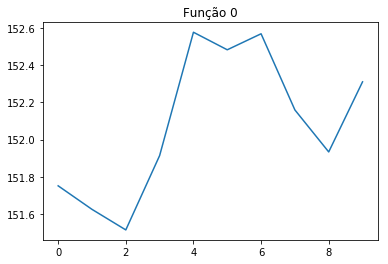

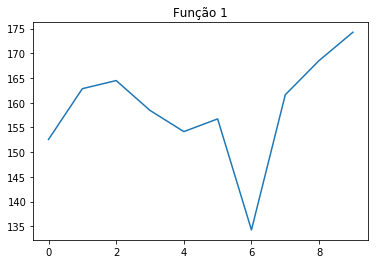

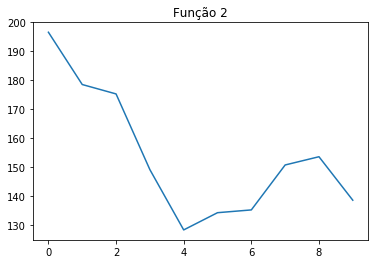

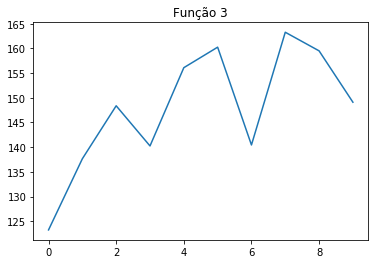

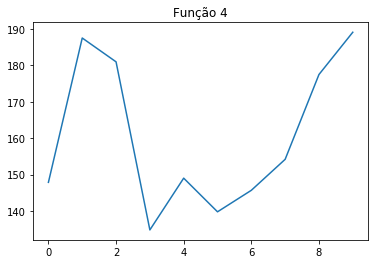

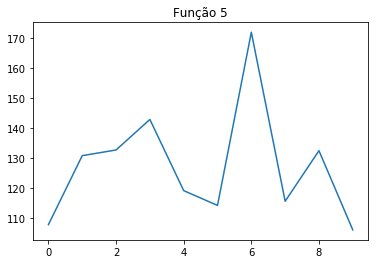

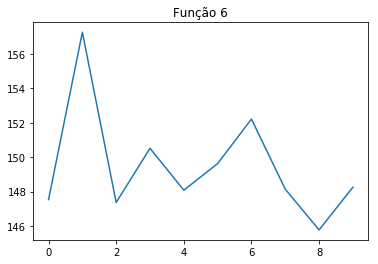

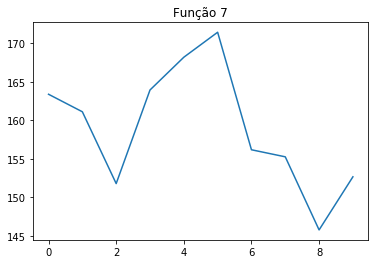

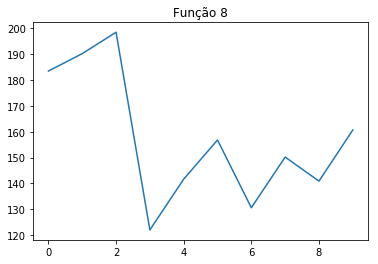

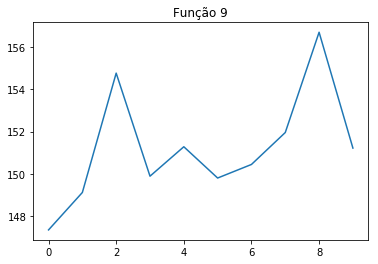

In [26]:
for i in range(X.shape[1]):
    plt.plot(b1[i] * X[i] + b0)
    plt.title('Função ' + str(i))
    plt.show()

## 6. Faça predição para todos os dados de entrada (X) usando o modelo criado, ou seja, descubra y_pred.

In [27]:
y_pred = model.predict(X)
y_pred

array([206.11706979,  68.07234761, 176.88406035, 166.91796559,
       128.45984241, 106.34908972,  73.89417947, 118.85378669,
       158.81033076, 213.58408893,  97.07853583,  95.1016223 ,
       115.06673301, 164.67605023, 103.07517946, 177.17236996,
       211.75953205, 182.84424343, 147.99987605, 124.01702527,
       120.33094632,  85.80377894, 113.11286302, 252.44934852,
       165.48821056, 147.72187623,  97.12824075, 179.09342974,
       129.05497324, 184.78138552, 158.71515746,  69.47588393,
       261.50255826, 112.81897436,  78.37194762,  87.66624129,
       207.92460213, 157.87686037, 240.84370686, 136.93372685,
       153.48187659,  74.15703284, 145.63105805,  77.8280105 ,
       221.0786645 , 125.22224022, 142.60147066, 109.4926324 ,
        73.14037106, 189.87368742, 157.93636782, 169.55816531,
       134.18186217, 157.72356219, 139.1077439 ,  72.73252701,
       207.8289973 ,  80.10834588, 104.08562488, 134.57807971,
       114.23779529, 180.67760064,  61.12644508,  98.72

## 7. Avalie o modelo através da métrica MSE. Calcule usando o Scikit Learn e também usando somente o Python ("manualmente").

In [28]:
mse = metrics.mean_squared_error(y, y_pred)
mse

2859.6903987680657

$ mse = \frac{ \sum_{i=1}^{n} ((y_i - yPred)^2)}{n} $

In [29]:
mse_manual = sum((y - y_pred) ** 2) / len(y)
mse_manual

2859.6903987680653

## 8. Crie um novo modelo de regressão linear para a feature que melhor se ajusta a uma função linear (ver questão 2a).
a) Calcule e exiba os coeficientes da função linear de forma manual (usando o Python, mas sem usar o Scikit Learn)

b) Calcule e exiba também os coeficientes da função linear de forma automatizada (usando o Scikit Learn).

c) Mostre um gráfico de dispersão com os pontos da feature e a linha que representa o modelo.

d) Calcule o MSE. 

In [47]:
model_6 = linear_model.LinearRegression()
X6 = [[i] for i in X[:,6]]
y_6 = [[i] for i in y]

In [48]:
model_6.fit(X6, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
b1_6 = np.sum((X6 - np.mean(X6)) * (y_6 - np.mean(y_6))) / np.sum((X6 - np.mean(X6)) ** 2)
b1_6

-639.1452793225127

In [33]:
b0_6 = np.mean(y) - b1_6 * np.mean(X6)
b0_6

152.13348416289594

In [34]:
model_6.coef_

array([-639.14527932])

In [35]:
model_6.intercept_

152.13348416289566

In [36]:
y_6_pred = model_6.predict(X6)
y_6_pred

array([179.87292978, 104.57368425, 172.81362551, 175.16672693,
       146.92950986, 125.75159706, 151.63571271, 137.51710417,
       170.46052409, 168.10742267, 161.0481184 , 193.99153832,
       123.39849564, 153.98881413,  99.86748141, 177.51982836,
       104.57368425, 177.51982836, 170.46052409, 128.10469848,
       151.63571271, 142.22330702, 137.51710417, 186.93223405,
       156.34191555, 189.28533547, 135.16400275, 144.57640844,
       156.34191555, 118.69229279, 137.51710417, 113.98608995,
       217.52255254,  76.33646718, 146.92950986,  66.92406149,
       128.10469848, 132.81090133, 165.75432124, 161.0481184 ,
       168.10742267, 142.22330702, 189.28533547,  76.33646718,
       201.05084258, 158.69501698, 149.28261129, 168.10742267,
       125.75159706, 198.69774116, 153.98881413, 170.46052409,
       135.16400275, 142.22330702, 118.69229279,  97.51437999,
       175.16672693, 118.69229279,  36.333743  , 132.81090133,
       118.69229279, 203.40394401, 113.98608995, 161.04

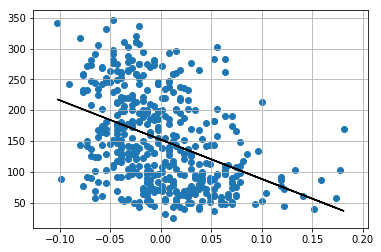

In [37]:
plt.grid()
plt.scatter(X6, y)
plt.plot(X6, y_6_pred, color='black')

In [38]:
mse_6 = metrics.mean_squared_error(y, y_6_pred)
mse_6

5005.661620710653

## 9. Crie um novo modelo de regressão linear para a feature que pior se ajusta a uma função linear (ver questão 2b).
a) Calcule e exiba os coeficientes da função linear.

b) Mostre um gráfico de dispersão com os pontos da feature e a linha que representa o modelo.

c) Calcule o MSE.

In [45]:
model_1 = linear_model.LinearRegression()
X1 = [[i] for i in X[:, 1]]
y_1 = [[i] for i in y]

In [35]:
model_1.fit(X1, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
b1_1 = np.sum((X1 - np.mean(X1)) * (y_1 - np.mean(y_1))) / np.sum((X1 - np.mean(X1)) ** 2)
b1_1

69.71535567841465

In [37]:
b0_1 = np.mean(y) - b1_1 * np.mean(X1)
b0_1

152.13348416289594

In [43]:
model_1.coef_

array([69.71535568])

In [44]:
model_1.intercept_

152.13348416289594

In [45]:
y_1_pred = model_1.predict(X1)
y_1_pred

array([155.66666667, 149.0212766 , 155.66666667, 149.0212766 ,
       149.0212766 , 149.0212766 , 155.66666667, 155.66666667,
       155.66666667, 149.0212766 , 149.0212766 , 155.66666667,
       149.0212766 , 155.66666667, 149.0212766 , 155.66666667,
       149.0212766 , 155.66666667, 149.0212766 , 149.0212766 ,
       149.0212766 , 155.66666667, 149.0212766 , 155.66666667,
       149.0212766 , 155.66666667, 149.0212766 , 149.0212766 ,
       149.0212766 , 155.66666667, 149.0212766 , 149.0212766 ,
       155.66666667, 149.0212766 , 149.0212766 , 155.66666667,
       149.0212766 , 149.0212766 , 155.66666667, 155.66666667,
       155.66666667, 149.0212766 , 155.66666667, 149.0212766 ,
       155.66666667, 155.66666667, 149.0212766 , 149.0212766 ,
       155.66666667, 155.66666667, 149.0212766 , 155.66666667,
       149.0212766 , 149.0212766 , 149.0212766 , 149.0212766 ,
       149.0212766 , 149.0212766 , 149.0212766 , 155.66666667,
       149.0212766 , 155.66666667, 155.66666667, 149.02

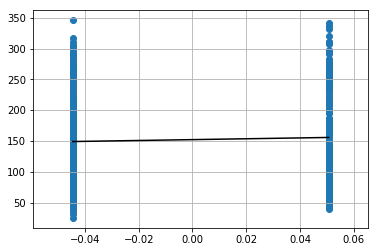

In [46]:
plt.grid()
plt.scatter(X1, y)
plt.plot(X1, y_1_pred, color='black')

In [47]:
mse_1 = metrics.mean_squared_error(y, y_1_pred)
mse_1

5918.888899586022